In [2]:
%load_ext autoreload

In [7]:
%autoreload
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from intrusion_detection.load_input_data import load_df
from intrusion_detection.preprocessing import preprocess_data
from intrusion_detection.target_definition import define_target


In [4]:
df = load_df(
    file_path="../../data/kddcup.data_10_percent",
    header_file="../../data/kddcup.names"
)
df = preprocess_data(df)

In [5]:
df.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,attack_type
0,0,tcp,http,SF,181,5450,0,0,0,0,...,9,1.0,0.0,0.11,0.0,0.0,0.0,0.0,0.0,normal
1,0,tcp,http,SF,239,486,0,0,0,0,...,19,1.0,0.0,0.05,0.0,0.0,0.0,0.0,0.0,normal
2,0,tcp,http,SF,235,1337,0,0,0,0,...,29,1.0,0.0,0.03,0.0,0.0,0.0,0.0,0.0,normal
3,0,tcp,http,SF,219,1337,0,0,0,0,...,39,1.0,0.0,0.03,0.0,0.0,0.0,0.0,0.0,normal
4,0,tcp,http,SF,217,2032,0,0,0,0,...,49,1.0,0.0,0.02,0.0,0.0,0.0,0.0,0.0,normal


## Choose the anomalous classes


Text(0.5, 1.0, 'Number of connections per attack type')

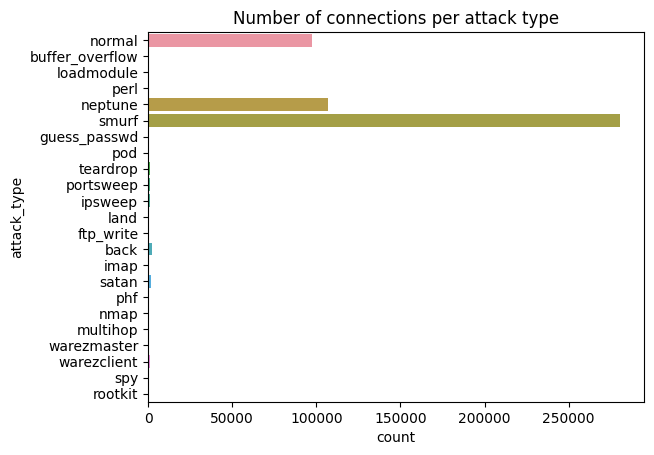

In [6]:
# Calculate the frequency for each class
sns.countplot(
    data=df,
    y="attack_type",
)
plt.title("Number of connections per attack type")

From the plot above we notice that the 3 most frequent classes for attack type are `smurf` and `neptune` and `normal`. All other attack types are very rare. The class `normal` represents normal connections that are not to be considered as cyber attack. The classes `smurf` and `neptune` are DDOS attacks. DDOS attacks are a type of cyber attacks where attackers try to break a system by overloading it with requests.

The strategy that I plan to utilize to model this behavior and to distinguish the `normal` class from the attack classes is to utilize two models in cascade. The fist model will be specialized in identifying rare anomalies (so all attacks except the DDOS ones) and the second model that is specialized in detecting connections from DDOS attacks.

To better simulate a realistic scenario, where lables are not available, I will tackle the problem using unsupervised learning approaches and I will utilize the attack type lables only for the final model evaluation.

### Define Target

From this point on, we can define our target as `1` when the connection type is not of type `normal`.

In [8]:
df = define_target(df)

<AxesSubplot: xlabel='target_anomaly', ylabel='count'>

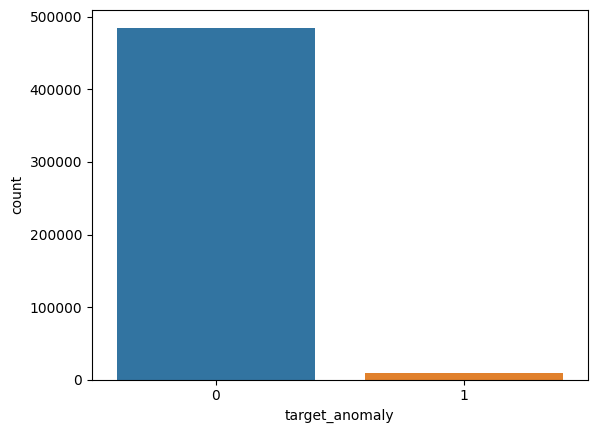

In [9]:
sns.countplot(
    data=df,
    x='target_anomaly',
)

In [20]:
value_counts = df.target_anomaly.value_counts()
imbalance_ratio = value_counts[1] / (value_counts[1] + value_counts[0])

print(f"For the first problem, we have an imbalance problem with an imbalance ratio of {imbalance_ratio}")

For the first problem, we have an imbalance problem with an imbalance ratio of 0.0177158460875145


<AxesSubplot: xlabel='target_ddos', ylabel='count'>

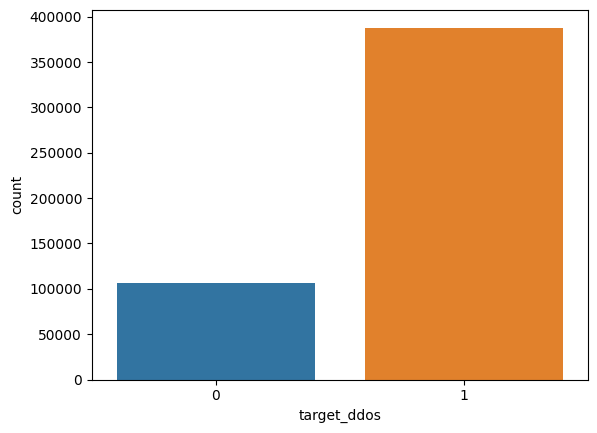

In [12]:
sns.countplot(
    data=df,
    x='target_ddos',
)

In [19]:
value_counts = df.target_ddos.value_counts()
imbalance_ratio = value_counts[0] / (value_counts[1] + value_counts[0])
print(f"For the second problem, we have an imbalance problem with an imbalance ratio of {imbalance_ratio}")

For the second problem, we have an imbalance problem with an imbalance ratio of 0.21462650373162276
